In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%autoreload 2

In [6]:
from postprocess import postprocess
import os
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [22]:
os.chdir('C:\\Users\\Ankit\\nse\\uoicorr')
en = postprocess('01062019')

In [23]:
en.shape

(360, 10)

Plots to create: 

* Typical selection profiles across block sizes, sparsity, and correlation strengths (verify functioning, not necessarily to report)
* False negative rate as a function of block size and correlation strength
* False negative rate vs. false positive rate for different sparsity, block size, and correlation strength
* R^2 performance as function of sparsity, block size, and correlation strength



# Typical Selection Profiles

In [27]:
en02 = en.loc[(en['sparsity'] == 0.8) & (en['block_size'] == 6)]

In [15]:
en02.iloc[5]

beta             [[3.269084913776118, 0.0, 9.095430788932365, 0...
beta_hats        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
block_size                                                       6
correlation                                                    0.4
fn               [16.0, 12.0, 10.0, 16.0, 14.0, 17.0, 13.0, 17....
fp               [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
r2               [0.32092219970588254, 0.528696745432609, 0.741...
r2_true          [[0.9063005062481531, 0.9011380049710269, 0.90...
sel_thres_min                                                    1
sparsity                                                       0.4
Name: 161, dtype: object

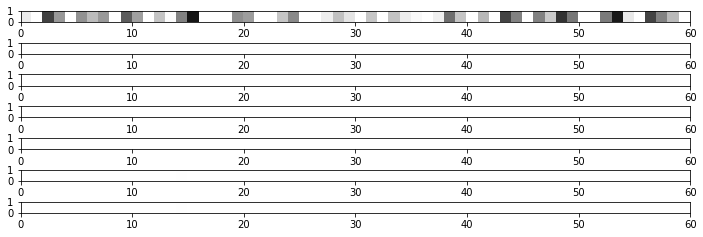

In [28]:
fig, ax = plt.subplots(7, 1, figsize=(12, 4))
# True beta
ax[0].set_aspect('equal')
ax[0].pcolor(en02.iloc[0].beta[1, :, np.newaxis].T, cmap='Greys', vmin = 0, vmax = 10)

ax[1].set_aspect('equal')
ax[1].pcolor(en02.iloc[0].beta_hats[10, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)

ax[2].set_aspect('equal')
ax[2].pcolor(en02.iloc[1].beta_hats[10, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)

ax[3].set_aspect('equal')
ax[3].pcolor(en02.iloc[2].beta_hats[10, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)

ax[4].set_aspect('equal')
ax[4].pcolor(en02.iloc[3].beta_hats[10, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)

ax[5].set_aspect('equal')
ax[5].pcolor(en02.iloc[4].beta_hats[10, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)

ax[6].set_aspect('equal')
ax[6].pcolor(en02.iloc[5].beta_hats[10, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)

## False negative rate

In [25]:
# Stick to LST 1, make separate curves for each block size, and plot FNR as a function of correlation 

# Select the relevant data:
dat = []
dat.append(en.loc[(en['sparsity'] == 0.2) & (en['sel_thres_min'] == 1)])
dat.append(en.loc[(en['sparsity'] == 0.4) & (en['sel_thres_min'] == 1)])
dat.append(en.loc[(en['sparsity'] == 0.6) & (en['sel_thres_min'] == 1)])
dat.append(en.loc[(en['sparsity'] == 0.8) & (en['sel_thres_min'] == 1)])
dat.append(en.loc[(en['sparsity'] == 1) & (en['sel_thres_min'] == 1)])

ValueError: index 4 is out of bounds for array with size 4

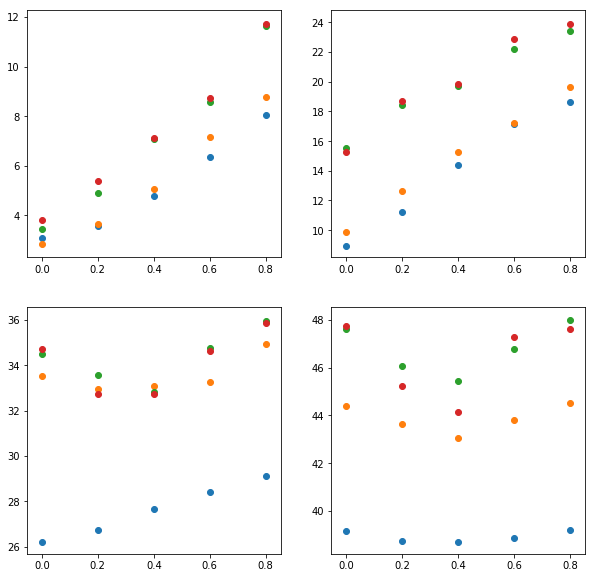

In [18]:
correlations = [0, 0.2, 0.6, 0.4, 0.8]
block_size = [6, 12, 20, 30]
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
for i, d in enumerate(dat):
    # Organize by block_size and correlations
    fn_avg = np.zeros((len(block_size), len(correlations)))
    for j, b in enumerate(block_size):
        for k, c in enumerate(correlations):
        # For each instance, average across repititions
            dd = d.loc[(d['correlation'] == c) & (d['block_size'] == b)]
            fn_avg[j, k] = np.mean(dd.fn.values[0])
    a = ax[np.unravel_index(i, (2, 2))]
    a.scatter(correlations, fn_avg[0, :])
    a.scatter(correlations, fn_avg[1, :])
    a.scatter(correlations, fn_avg[2, :])
    a.scatter(correlations, fn_avg[3, :])

## False negative rate vs. false positive rate

ValueError: index 4 is out of bounds for array with size 4

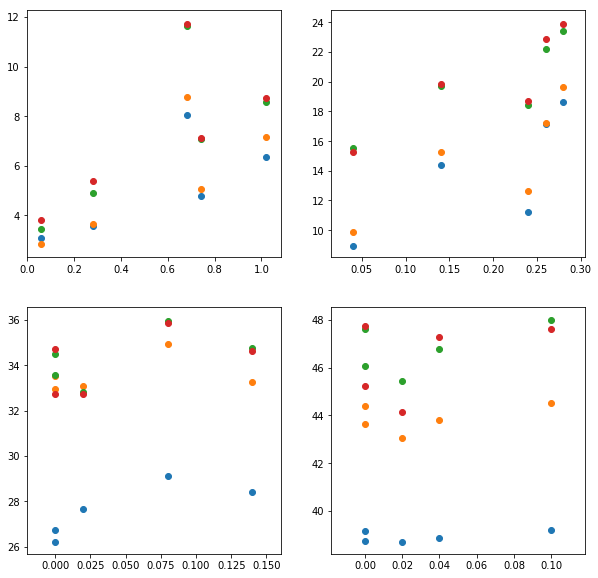

In [19]:
correlations = [0, 0.2, 0.6, 0.4, 0.8]
block_size = [6, 12, 20, 30]
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
for i, d in enumerate(dat):
    # Organize by block_size and correlations
    fn_avg = np.zeros((len(block_size), len(correlations)))
    fp_avg = np.zeros((len(block_size), len(correlations)))
    for j, b in enumerate(block_size):
        for k, c in enumerate(correlations):
        # For each instance, average across repititions
            dd = d.loc[(d['correlation'] == c) & (d['block_size'] == b)]
            fn_avg[j, k] = np.mean(dd.fn.values[0])
            fp_avg[j, k] = np.mean(dd.fp.values[0])
    a = ax[np.unravel_index(i, (2, 2))]
    a.scatter(fp_avg[0, :], fn_avg[0, :])
    a.scatter(fp_avg[0, :], fn_avg[1, :])
    a.scatter(fp_avg[0, :], fn_avg[2, :])
    a.scatter(fp_avg[0, :], fn_avg[3, :])            

## R^2 as a function of sparsity, block size, and correlation strength

ValueError: index 4 is out of bounds for array with size 4

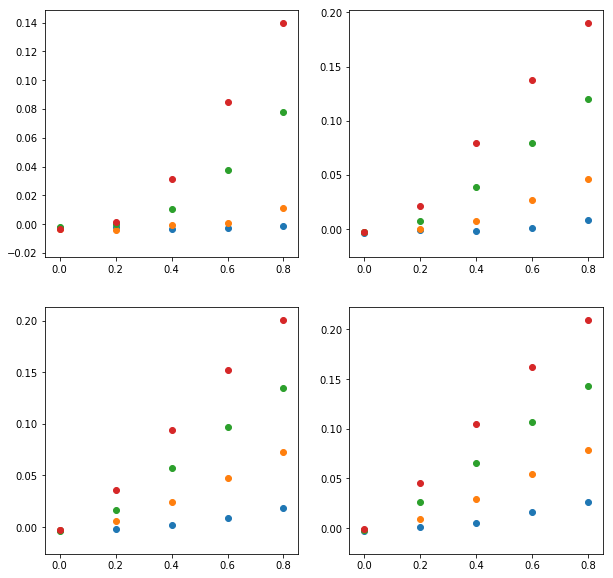

In [26]:
correlations = [0, 0.2, 0.6, 0.4, 0.8]
block_size = [6, 12, 20, 30]
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
for i, d in enumerate(dat):
    # Organize by block_size and correlations
    r2_avg = np.zeros((len(block_size), len(correlations)))
    for j, b in enumerate(block_size):
        for k, c in enumerate(correlations):
        # For each instance, average across repititions
            dd = d.loc[(d['correlation'] == c) & (d['block_size'] == b)]
            r2_avg[j, k] = np.mean(dd.r2.values[0])
    a = ax[np.unravel_index(i, (2, 2))]
    a.scatter(correlations, r2_avg[0, :])
    a.scatter(correlations, r2_avg[1, :])
    a.scatter(correlations, r2_avg[2, :])
    a.scatter(correlations, r2_avg[3, :])

## Plain Sklearn ElasticNet

In [156]:
from scipy.linalg import block_diag
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNetCV, Lasso
import time

In [157]:
# Generate data analogously to the script
n_features = 60
block_sizes = [6, 12, 20, 30]
kappa = 0.1
est_score = 'BIC'
reps = 50
correlations = [0, 0.2, 0.4, 0.6, 0.8, 1]
selection_thres_mins = 1
sparsities = [0.2, 0.4, 0.6, 0.8, 1]

# Ensure that selection_thres_mins and correlations are numpy arrays
if not isinstance(selection_thres_mins, np.ndarray):
    if np.isscalar(selection_thres_mins):
        selection_thres_mins = np.array([selection_thres_mins])
    else:
        selection_thres_mins = np.array(selection_thres_mins)

if not isinstance(correlations, np.ndarray):
    if np.isscalar(correlations):
        correlations = np.array([correlations])
    else:
        correlations = np.array(correlations)

# set up other variables
n_samples = 5 * n_features

# result arrays: fits
betas = np.zeros((reps, n_features, len(sparsities), len(block_sizes)))
beta_hats = np.zeros((reps, correlations.size, len(sparsities), len(block_sizes), n_features))
# result arrays: scores
fn_results = np.zeros((reps, correlations.size, len(sparsities), len(block_sizes)))
fp_results = np.zeros((reps, correlations.size, len(sparsities), len(block_sizes)))
r2_results = np.zeros((reps, correlations.size, len(sparsities), len(block_sizes)))
r2_true_results = np.zeros((reps, correlations.size, len(sparsities), len(block_sizes)))

thres_idx = 0
for block_idx, block_size in enumerate(block_sizes):
    n_blocks = int(np.floor(n_features/block_size))

    for spr_idx, sparsity in enumerate(sparsities):
        start = time.time()
        n_nonzero_beta = int(sparsity * block_size)
        for rep in range(reps):
            beta = np.random.uniform(low=0, high=10, size=(n_features, 1))
            mask = np.array([])
            for block in range(n_blocks):
                block_mask = np.zeros(block_size)
                block_mask[:n_nonzero_beta] = np.ones(n_nonzero_beta)
                np.random.shuffle(block_mask)
                mask = np.concatenate((mask, block_mask))
            mask = mask[..., np.newaxis]
            beta = beta * mask
            betas[rep, :, spr_idx, block_idx] = beta.ravel()
            for corr_idx, correlation in enumerate(correlations):
                # create covariance matrix for block
                block_Sigma = correlation * np.ones((block_size, block_size)) 
                np.fill_diagonal(block_Sigma, np.ones(block_size))
                # populate entire covariance matrix
                rep_block_Sigma = [block_Sigma] * n_blocks
                Sigma = block_diag(*rep_block_Sigma)
                if not np.all([x == 1 for x in np.diagonal(Sigma)]):
                    pdb.set_trace()
                # draw samples
                X = np.random.multivariate_normal(mean=np.zeros(n_features), cov=Sigma, size=n_samples)
                X_test = np.random.multivariate_normal(mean=np.zeros(n_features), cov=Sigma, size=n_samples)

                # Normalize samples
                X = X/np.max(X)
                
                # signal and noise variance
                signal_variance = np.sum(Sigma * np.dot(beta, beta.T))
                noise_variance = kappa * signal_variance
                # draw noise
                noise = np.random.normal(loc=0, scale=np.sqrt(noise_variance), size=(n_samples, 1))
                noise_test = np.random.normal(loc=0, scale=np.sqrt(noise_variance), size=(n_samples, 1))
                # response variable
                y = np.dot(X, beta) + noise
                y_test = np.dot(X_test, beta) + noise_test
                
                # Center response
                y = y - np.mean(y)
                y_test = y_test - np.mean(y_test)
                
                en = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1], cv = 10)
                en.fit(X, y.ravel())
                beta_hat = en.coef_
                beta_hats[rep, corr_idx, spr_idx, block_idx, :] = beta_hat
                fn_results[rep, corr_idx, spr_idx, block_idx] = np.count_nonzero(beta[beta_hat == 0, 0])
                fp_results[rep, corr_idx, spr_idx, block_idx] = np.count_nonzero(beta_hat[beta.ravel() == 0])
                r2_results[rep, corr_idx, spr_idx, block_idx] = r2_score(y_test, np.dot(X_test, beta_hat))
                r2_true_results[rep, corr_idx, spr_idx, block_idx] = r2_score(y_test, np.dot(X_test, beta))
        print(time.time() - start)

366.56330037117004
360.2836124897003
1145.5328557491302
297.09116435050964
306.5648217201233


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


410.0389895439148


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

397.85558223724365
390.23297572135925


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


381.830486536026


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


386.8938777446747


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

564.1796026229858


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

529.3039059638977


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

495.5143074989319


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

485.86911177635193


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

469.8888635635376


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


724.464775800705


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

656.388906955719


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

620.7318744659424


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

590.1855368614197


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

571.7688703536987


C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [148]:
np.std(X

array([1.00121879, 1.00121878, 1.00121879, 1.00121879, 1.00121879,
       1.0012188 , 1.00121879, 1.00121879, 1.00121879, 1.0012188 ,
       1.00121878, 1.0012188 , 1.0012188 , 1.00121878, 1.0012188 ,
       1.0012188 , 1.00121879, 1.00121878, 1.00121879, 1.00121879,
       1.00121879, 1.0012188 , 1.00121878, 1.00121879, 1.00121879,
       1.0012188 , 1.0012188 , 1.0012188 , 1.00121879, 1.00121879,
       0.77809856, 0.77809856, 0.77809856, 0.77809856, 0.77809857,
       0.77809856, 0.77809856, 0.77809856, 0.77809856, 0.77809856,
       0.77809857, 0.77809856, 0.77809856, 0.77809856, 0.77809856,
       0.77809856, 0.77809856, 0.77809856, 0.77809856, 0.77809856,
       0.77809856, 0.77809856, 0.77809856, 0.77809856, 0.77809856,
       0.77809856, 0.77809856, 0.77809856, 0.77809856, 0.77809855])

In [67]:
import pandas as pd

In [158]:
# Convert the arrays into pandas format
data_list = []
for block_idx, block_size in enumerate(block_sizes):
    for spr_idx, sparsity in enumerate(sparsities):
        for corr_idx, correlation in enumerate(correlations):
            data_dict = {}
            
            data_dict['sparsity'] = sparsity
            data_dict['block_size'] = block_size
            data_dict['sel_thres_min'] = 1
            data_dict['correlation'] = correlation
            data_dict['beta'] = betas[:, :, spr_idx, block_idx]
            data_dict['r2_true'] = r2_true_results[:, corr_idx, spr_idx, block_idx]
            data_dict['r2'] = r2_results[:, corr_idx, spr_idx, block_idx]
            data_dict['fn'] = fn_results[:, corr_idx, spr_idx, block_idx]
            data_dict['fp'] = fp_results[:, corr_idx, spr_idx, block_idx]
            data_dict['beta_hats'] = beta_hats[:, corr_idx, spr_idx, block_idx, :]

            data_list.append(data_dict)

en = pd.DataFrame(data_list)

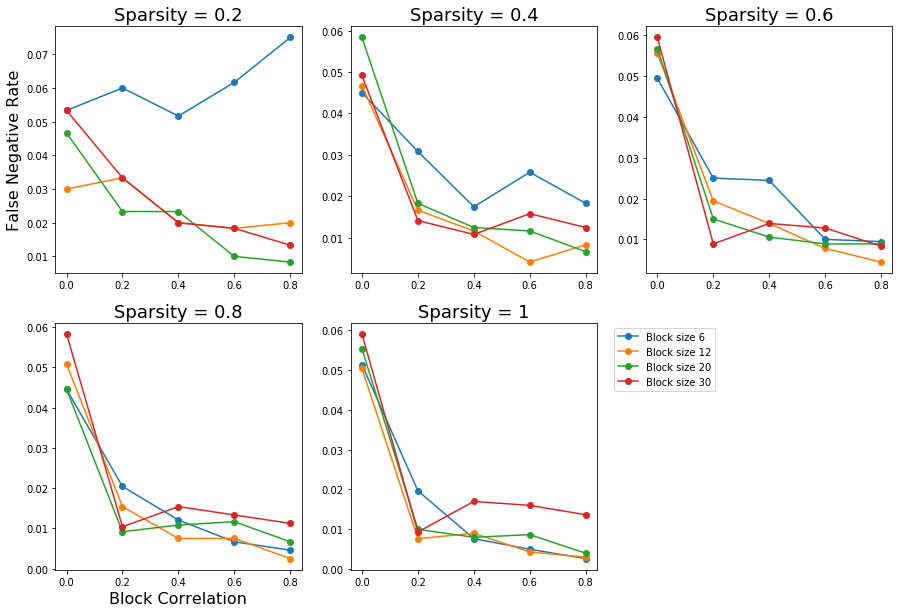

In [114]:
correlations = [0, 0.2, 0.4, 0.6, 0.8]
block_size = [6, 12, 20, 30]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
# Organize by block_size and correlations
r2_avg = np.zeros((len(block_size), len(correlations)))
for i, s in enumerate(sparsities):
    d = en.loc[en['sparsity'] == s]
    for j, b in enumerate(block_size):
        for k, c in enumerate(correlations):
        # For each instance, average across repititions
            dd = d.loc[(d['correlation'] == c) & (d['block_size'] == b)]
            fn_avg[j, k] = np.mean(dd.fn.values[0])/(60 * s)
    a = ax[np.unravel_index(i, (2, 3))]
    a.plot(correlations, fn_avg[0, :], '-o')
    a.plot(correlations, fn_avg[1, :], '-o')
    a.plot(correlations, fn_avg[2, :], '-o')
    a.plot(correlations, fn_avg[3, :], '-o')

fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('False Negative Rate', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Block Correlation', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['Block size 6', 'Block size 12', 'Block size 20', 'Block size 30'], loc = 'upper right', bbox_to_anchor=(1.5, 1))

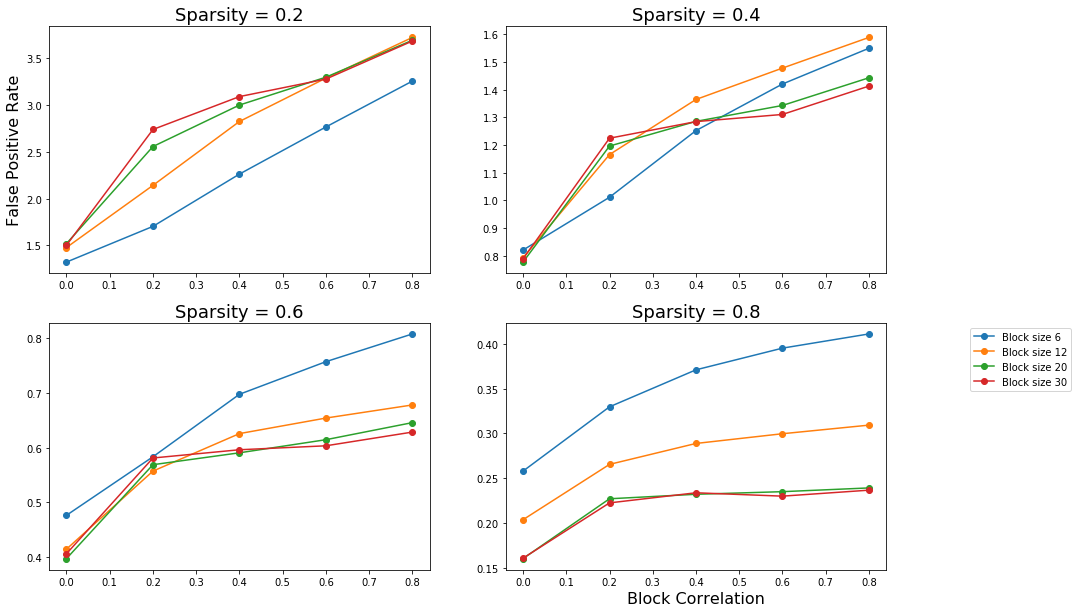

In [115]:
sparsities = [0.2, 0.4, 0.6, 0.8]
correlations = [0, 0.2, 0.4, 0.6, 0.8]
block_size = [6, 12, 20, 30]
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
# Organize by block_size and correlations
r2_avg = np.zeros((len(block_size), len(correlations)))
for i, s in enumerate(sparsities):
    d = en.loc[en['sparsity'] == s]
    for j, b in enumerate(block_size):
        for k, c in enumerate(correlations):
        # For each instance, average across repititions
            dd = d.loc[(d['correlation'] == c) & (d['block_size'] == b)]
            fn_avg[j, k] = np.mean(dd.fp.values[0])/(60 * s)
    a = ax[np.unravel_index(i, (2, 2))]
    a.plot(correlations, fn_avg[0, :], '-o')
    a.plot(correlations, fn_avg[1, :], '-o')
    a.plot(correlations, fn_avg[2, :], '-o')
    a.plot(correlations, fn_avg[3, :], '-o')

ax[np.unravel_index(0, (2, 2))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 2))].set_ylabel('False Positive Rate', fontsize=16)
ax[np.unravel_index(1, (2, 2))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 2))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 2))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 2))].set_xlabel('Block Correlation', fontsize=16)
ax[np.unravel_index(3, (2, 2))].legend(['Block size 6', 'Block size 12', 'Block size 20', 'Block size 30'], loc = 'upper right', bbox_to_anchor=(1.5, 1))

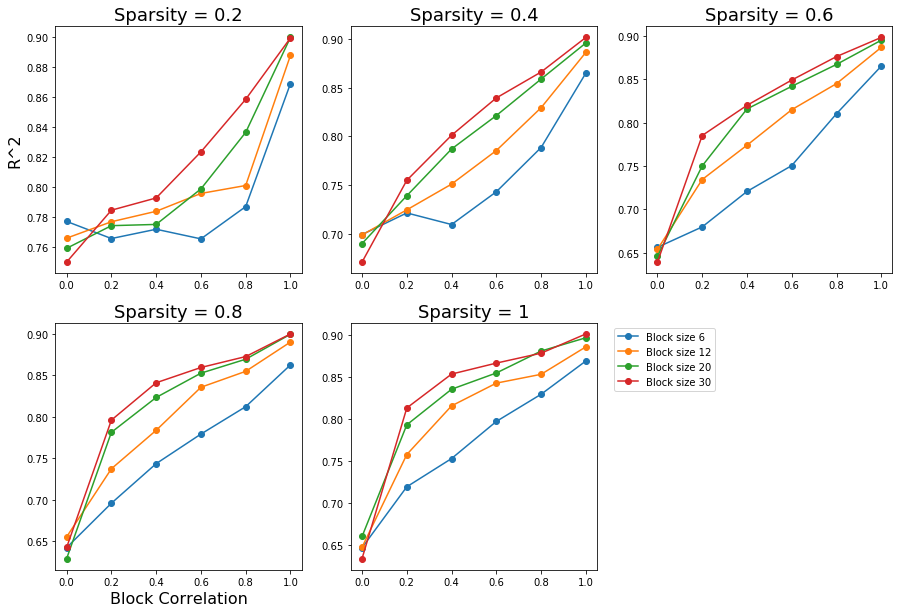

In [159]:
sparsities = [0.2, 0.4, 0.6, 0.8, 1]
correlations = [0, 0.2, 0.4, 0.6, 0.8, 1]
block_size = [6, 12, 20, 30]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
# Organize by block_size and correlations
r2_avg = np.zeros((len(block_size), len(correlations)))
for i, s in enumerate(sparsities):
    d = en.loc[en['sparsity'] == s]
    for j, b in enumerate(block_size):
        for k, c in enumerate(correlations):
        # For each instance, average across repititions
            dd = d.loc[(d['correlation'] == c) & (d['block_size'] == b)]
            r2_avg[j, k] = np.mean(dd.r2.values[0])
    a = ax[np.unravel_index(i, (2, 3))]
    a.plot(correlations, r2_avg[0, :], '-o')
    a.plot(correlations, r2_avg[1, :], '-o')
    a.plot(correlations, r2_avg[2, :], '-o')
    a.plot(correlations, r2_avg[3, :], '-o')
    

fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('R^2', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Block Correlation', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['Block size 6', 'Block size 12', 'Block size 20', 'Block size 30'], loc = 'upper right', bbox_to_anchor=(1.5, 1))